# Edge detection tests

In [1]:
import numpy as np
from skimage.morphology import disk, remove_small_objects
from skimage import exposure, feature, morphology
from skimage.filters import gaussian, meijering, sato, frangi, hessian
from PIL import Image
from matplotlib import pyplot as plt

from script_tp2 import *

In [2]:
img =  np.asarray(Image.open(f'./images_IOSTAR/star01_OSC.jpg')).astype(np.uint8)
img_mask = masking(img)
img_rescaled = img
img_rescaled[img_mask == 1] = exposure.rescale_intensity(img[img_mask == 1])

# Idea 1 : Canny

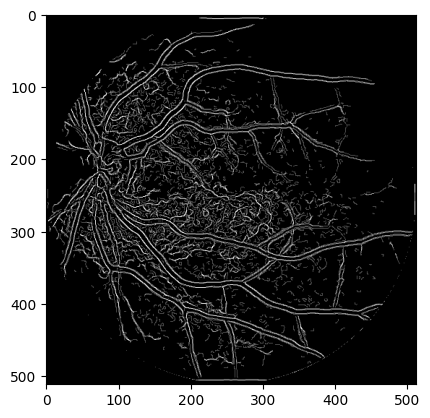

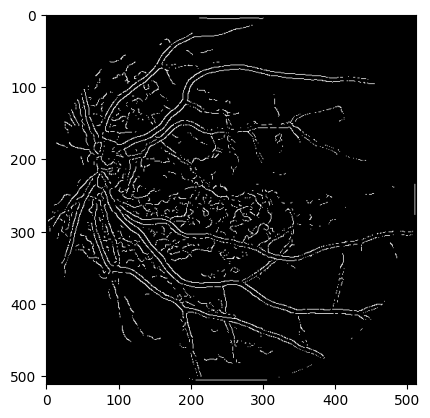

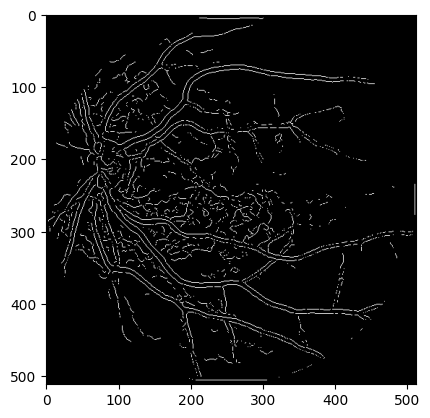

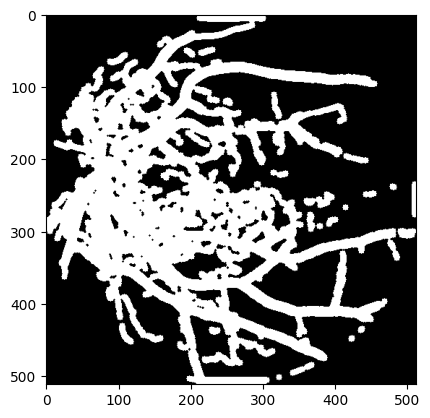

In [3]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

sigmas = [1, 2, 3]
img_edge_canny = []

for sigma in sigmas:
    edges = feature.canny(img_rescaled, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold, use_quantiles=True, mask = img_mask)
    # Store the edge map
    img_edge_canny.append(edges)

# Combine edge maps from different scales
combined_edges = sum(img_edge_canny)  # Or use any appropriate combination method
plt.imshow(combined_edges, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = combined_edges > 1.5
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

img_thin = morphology.thin(thresholded_edges)
plt.imshow(img_thin, cmap='grey')
plt.show()

img_dilation = morphology.dilation(img_thin, disk(dilation_disk))
img_closing = morphology.erosion(img_dilation, disk(erosion_disk))
plt.imshow(img_closing, cmap='grey')
plt.show()



In [4]:
img_out = img_closing
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
f1score = evaluate(img_out, img_GT)[2]
print(f1score)

0.4932950191570881


# 2. Idea 2 : Top-hat

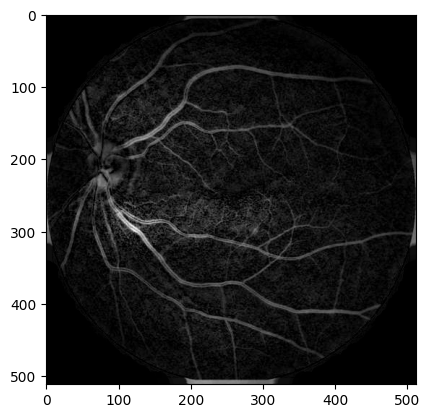

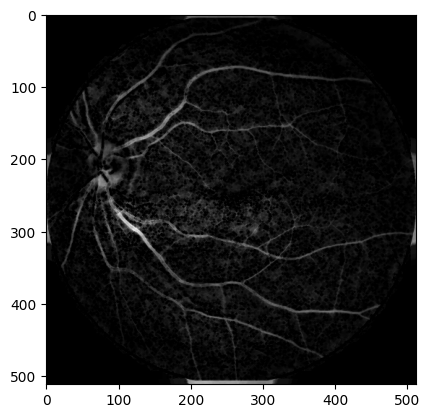

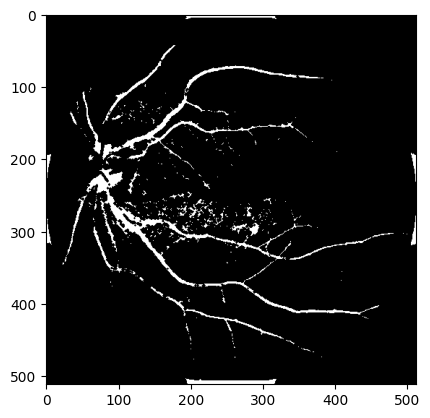

In [5]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_top_hat = morphology.black_tophat(img_rescaled, disk(10))
plt.imshow(img_top_hat, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_top_hat, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = img_erosion > 25
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

# img_thin = morphology.thin(thresholded_edges)
# plt.imshow(img_thin, cmap='grey')
# plt.show()

In [6]:
img_out = thresholded_edges
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

0.6286910020925366
0.4675773819816704
0.5362951209837367


# 3. Idée 3 : Ridge operators

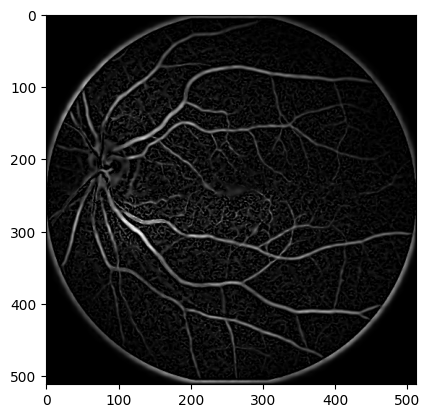

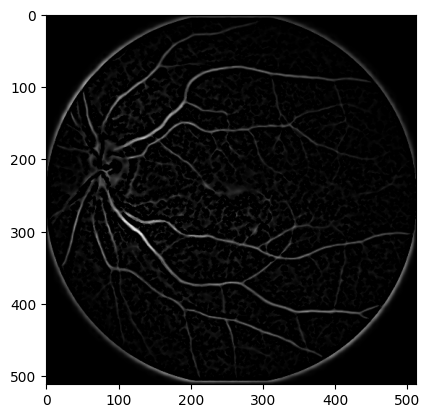

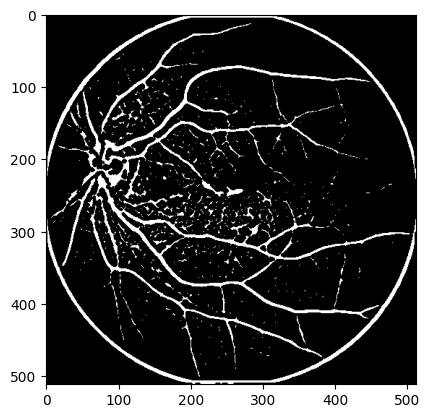

0.5153294194390085
0.6870760132196904
0.5889369315640375


In [7]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_meijering = meijering(img_rescaled, sigmas=[1, 2, 3])
img_masked = img_meijering[img_mask==1]
plt.imshow(img_meijering, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_meijering, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = img_erosion > 0.1
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

img_out = thresholded_edges
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

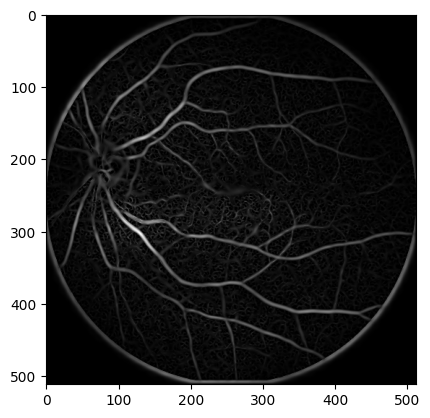

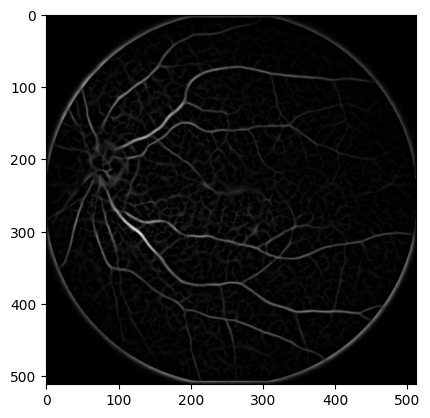

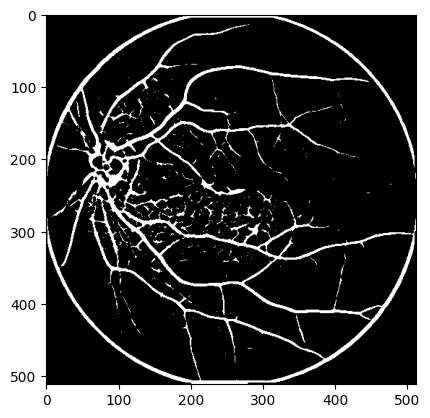

0.547309573724668
0.6813989907777971
0.6070376685785149


In [22]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_sato = sato(img_rescaled, sigmas=[1, 2, 3], black_ridges=True)
img_masked = img_sato[img_mask==1]
plt.imshow(img_sato, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_sato, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges_sato = img_erosion > 4
plt.imshow(thresholded_edges_sato, cmap='grey')
plt.show()

img_out = thresholded_edges_sato
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

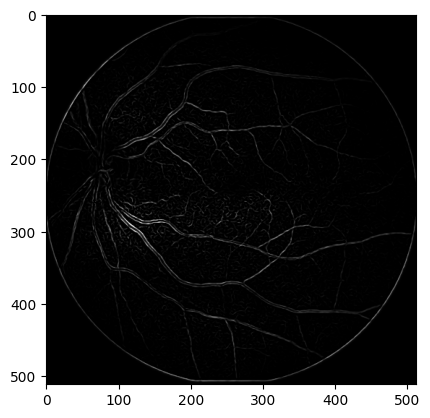

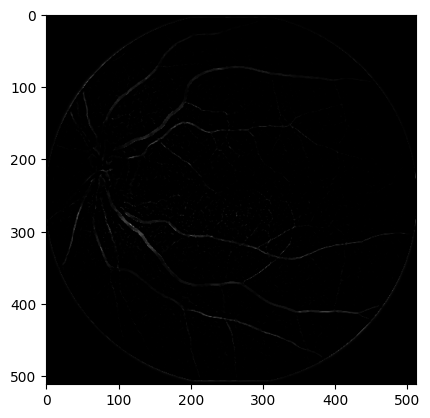

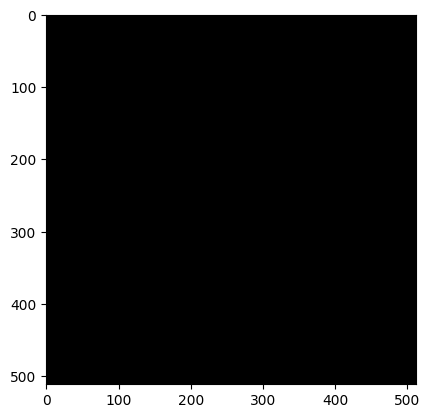

nan
0.0
nan


In [23]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_frangi = frangi(img_rescaled, sigmas=[1, 2, 3], black_ridges=True)
img_masked = img_frangi[img_mask==1]
plt.imshow(img_frangi, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_frangi, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = img_erosion > 4
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

img_out = thresholded_edges
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

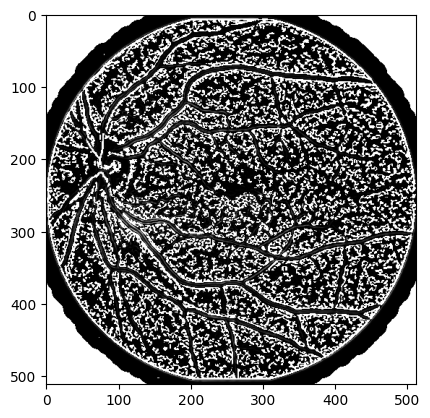

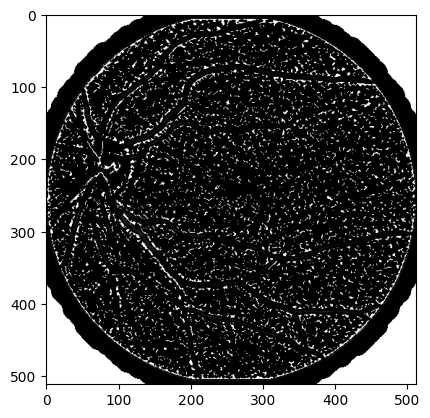

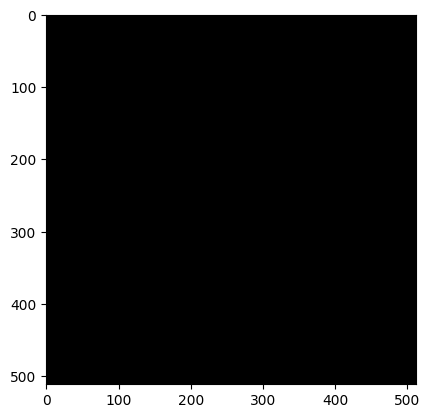

nan
0.0
nan


In [24]:
low_threshold = 0.7
high_threshold = 0.8
dilation_disk = 5
erosion_disk = 1

img_hessian = hessian(img_rescaled, sigmas=[1, 2, 3], black_ridges=True)
img_masked = img_hessian[img_mask==1]
plt.imshow(img_hessian, cmap='grey')
plt.show()

img_erosion = morphology.erosion(img_hessian, disk(erosion_disk))
plt.imshow(img_erosion, cmap='grey')
plt.show()

# Post-processing (e.g., edge linking, thresholding)
thresholded_edges = img_erosion > 4
plt.imshow(thresholded_edges, cmap='grey')
plt.show()

img_out = thresholded_edges
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)

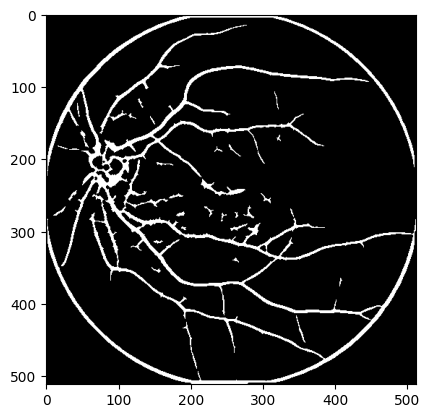

0.5825076870515886
0.6201127477723223
0.6007222760503832


In [25]:
img_remove = remove_small_objects(thresholded_edges_sato, 20)

plt.imshow(img_remove, cmap='grey')
plt.show()

img_out = img_remove
img_GT = np.asarray(Image.open(f'./images_IOSTAR/GT_01.png')).astype(np.uint8)
precis, recall, f1score = evaluate(img_out, img_GT)[0:3]
print(precis)
print(recall)
print(f1score)